In [2]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [3]:
from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

In [4]:
from sklearn import tree
from sklearn.datasets import make_classification

### 의사결정나무(Decision Tree)
: 분류와 회귀 분석에 사용되는 지도 학습 알고리즘
- 데이터의 특징(feature)들을 기반으로 한, 논리적인 의사결정 규칙들의 집합으로 이루어진, 트리 형태의 모델
- 각 내부 노드(internal node)는 특징의 값을 기반으로 데이터를 분할하고, 말단 노드(leaf node)는 예측값을 출력합니다.
    - 가장 좋은 특징(가장 잘 분할할 수 있는 기준)을 우선으로 분할
- 직관적이고 해석하기 쉬운 모델로서, 다양한 장단점을 가지고 있습니다.
    - 분류모델로서의 성능보다, 원인 파악-대응에 강점을 가짐

#### 의사결정나무의 작동 원리
- 데이터 분할<br>
: 가장 먼저, 주어진 데이터셋을 가장 좋은 특징으로 분할합니다. 이때 분할은 각 특징의 값을 기준으로 이루어집니다. 
<br>분할은 데이터를 가장 잘 분류하는 기준을 찾는 과정입니다.
- 특징 선택<br>
: 데이터 분할에 사용될 특징을 선택합니다. 이때 특징은 정보 이득(information gain)이나 지니 불순도(Gini impurity)와 같은 측정 지표를 사용하여 선택됩니다.
<br>이 측정 지표는 분할 전후의 데이터 집합의 불확실성을 측정하여, 분할이 얼마나 정보를 얻을 수 있는지를 나타냅니다.
- 트리 생성<br>
: 선택된 특징을 기준으로 데이터를 분할하여 하위 노드를 생성합니다. 이 과정을 재귀적으로 반복하여 트리를 계속 구성합니다.
<br>분할은 불순도를 최소화하거나 정보 이득을 최대화하는 방향으로 수행됩니다.
- 트리 가지치기<br>
: 트리 생성 과정에서 과적합(overfitting)을 방지하기 위해 <<<가지치기(pruning)>>>를 수행합니다.
<br>가지치기는 트리의 복잡성을 줄이는 과정으로, 불필요한 분기를 제거하거나 병합하여 모델을 간소화합니다.
- 예측<br>
: 생성된 의사결정나무를 사용하여 새로운 데이터의 예측값을 도출합니다. 이때 입력 데이터는 트리의 루트 노드부터 시작하여 하위 노드를 따라가며 예측값을 결정합니다.
<br>말단 노드에 도달하면 해당 노드의 클래스 레이블이 예측값으로 반환됩니다.


#### 장점:

- 해석력<br>
: 의사결정나무는 각 분기와 조건에 대해 직관적으로 해석이 가능합니다. 트리의 구조를 시각화하거나 규칙들을 해석함으로써 데이터의 특징과 의미를 이해할 수 있습니다.
<br>문제의 원인을 파악하는데 유용함

- 특징 중요도<br>
: 의사결정나무는 특징의 중요도를 추정하는 데 도움을 줍니다. 특징이 데이터를 분할하는 데 얼마나 큰 영향을 주는지를 파악할 수 있으며, 이를 활용하여 변수 선택이나 특징 엔지니어링에 유용합니다.

- 비선형 관계 모델링<br>
: 의사결정나무는 데이터 내의 비선형 관계(변수들 간의 관계가 직선이 아닌 곡선으로 나타남/ 다양한 상호작용)를 모델링할 수 있습니다. 선형 분류 모델보다 더 복잡한 패턴을 인식하고 학습할 수 있습니다.

- 이상치에 강건함<br>
: 의사결정나무는 이상치(outlier)에 상대적으로 강건한 모델입니다. 이상치가 다른 영역으로 분리될 수 있는 특징을 갖고 있다면, 의사결정나무는 이를 감지하고 해당 영역을 분리하는 분기를 생성할 수 있습니다.

#### 단점:
- 과적합 경향<br>
: 의사결정나무는 데이터의 작은 변화에도 민감하게 반응할 수 있으며, 과적합 문제가 발생할 수 있습니다. 과적합을 방지하기 위해 가지치기 기법이 사용되지만, 완벽한 방지는 어려울 수 있습니다.

- 클래스 불균형 문제<br>
: 클래스가 불균형하게 분포되어 있는 경우, 의사결정나무는 예측력이 약할 수 있습니다. 이는 트리의 구조가 클래스의 빈도에 크게 영향을 받기 때문입니다.

- 관련성이 없는 특징 처리<br>
: 의사결정나무는 특징들 간의 독립성을 가정합니다. 관련성이 없는 특징이 포함된 경우, 모델의 성능이 저하될 수 있습니다.

- 데이터의 작은 변화에 민감함<br>
: 입력 데이터의 작은 변화에도 트리 구조가 크게 변경될 수 있습니다. 이는 트리의 안안정성과 일반화 능력에 영향을 줄 수 있습니다. 즉, 입력 데이터가 약간 변경될 경우 트리의 구조가 크게 달라질 수 있으므로, 데이터의 작은 변화에 민감하게 반응할 수 있습니다.

- 고차원 데이터 처리 어려움<br>
: 의사결정나무는 고차원 데이터에 대한 처리가 어려울 수 있습니다. 특히 특징의 개수가 많아지면 트리의 깊이가 깊어지고 복잡한 모델이 생성될 수 있으며, 이는 모델의 해석과 계산 비용 증가로 이어질 수 있습니다.

- 데이터 부족 문제<br>
: 데이터가 부족한 경우 의사결정나무의 성능이 저하될 수 있습니다. 충분한 데이터가 없으면 트리의 분기를 충분히 확장할 수 없으며, 모델의 일반화 능력이 제한될 수 있습니다.

- 연속적인 특징 처리 어려움<br>
: 의사결정나무는 연속적인 특징을 처리하기 어렵습니다. 보통은 특정 임계값을 기준으로 이진 분할을 수행하므로, 연속적인 값에 대해서는 이산적인 값으로 변환해야 합니다.

#### 지니계수: 불순도를 측정하는 지표
- 해당 노드에서 클래스가 얼마나 잘 혼합되어 있는지
    - 지니계수(0~1사이 값)가 작을수록 해당 노드의 순도가 높아짐
    - 분할된 노드가 특정 클래스에 대해 더 순수하게 구성되어 있다는 것
    - ex. 2개의 클래스 중 하나의 클래스에 모든 데이터가 몰빵되어 있다면, 지니계수는 0
    
#### 정보이득지수: 분할 전/후 불순도 차이
- 해당 특성으로 인해 얻을 수 있는 정보의 양
    - 정보이득지수가 클수록 해당 특성이 분류 작업에 더 중요하다는 것을 의미
- 정보이득지수 = 분할 이전의 불순도 - (가중 평균을 통한 분할 후의 불순도)

### 지니 지수(Gini Index)와 정보 이득 지수(Information Gain)
- 의사결정나무에서 특징 선택에 사용되는 지표입니다. 이 두 지표는 데이터의 분할을 평가하여 어떤 특징이 분할에 가장 유용한지를 결정하는 데 도움을 줍니다.

#### 지니 지수 (Gini Index):
- 데이터의 불순도를 측정하는 지표입니다. 의사결정나무에서는 특정 특징을 기준으로 데이터를 분할할 때, 각 분할된 영역의 지니 지수를 계산하고, 이를 최소화하는 방향으로 분할을 수행합니다.
- 0부터 1까지의 값을 가지며, 0에 가까울수록 데이터가 순수하게 분류되었음을 의미합니다. 지니 지수는 다음과 같이 계산됩니다:
- 지니지수(Gini Index) = 1 - (클래스 1의 비율)^2 - (클래스 2의 비율)^2 - ... - (클래스 n의 비율)^2
- 예를 들어, 이진 분류 문제에서 지니 지수를 계산하려면 클래스 1과 클래스 2의 비율을 알아야 합니다. 비율이 균등하다면 지니 지수는 최대값인 0.5를 가지며, 한 클래스에 대한 비율이 1이고 다른 클래스에 대한 비율이 0이면 지니 지수는 0이 됩니다.
    
#### 정보 이득 지수 (Information Gain):
- 정보 이득 지수는 데이터 분할 전후의 불확실성 감소를 측정하는 지표입니다. 정보 이득 지수는 분할 전의 불확실성과 분할 후의 불확실성의 차이로 계산됩니다. 의사결정나무에서는 가능한 모든 특징에 대해 정보 이득 지수를 계산하고, 가장 높은 정보 이득을 가지는 특징을 선택하여 분할을 수행합니다.
- 정보이득지수(information Gain) = 1 - 엔트로피(혼잡도) 지수
- 여기서 엔트로피(Entropy)는 데이터의 불확실성을 측정하는 지표로 사용됩니다. 엔트로피 값은 0에 가까울수록 데이터가 순수하게 분류되었음을 의미합니다.
- 분할 전후의 불확실성을 비교하여 정보 이득이 높은 특징을 선택하는 것이 목표입니다. 정보 이득이 높은 특징은 해당 특징을 기준으로 데이터를 분할할 때 클래스의 불확실성을 가장 많이 감소시킬 수 있는 특징입니다.<br><br>

- 지니 지수와 정보 이득 지수는 의사결정나무에서 특징 선택에 사용되는 두 가지 주요 지표입니다. 둘 다 데이터의 불확실성을 측정하여 분할에 대한 평가를 도와줍니다. 그러나 지니 지수는 분류 작업에 더 효과적이고 정보 이득 지수는 분류와 회귀 작업 모두에 사용될 수 있습니다.

- 의사결정나무에서는 주어진 데이터셋에서 모든 가능한 특징에 대해 지니 지수나 정보 이득 지수를 계산한 후, 최적의 분할을 결정하기 위해 가장 높은 지표를 선택합니다. 이를 반복하여 트리를 구성하고, 이를 통해 새로운 데이터의 예측을 수행할 수 있습니다.

- 정보 이득과 지니 지수는 특징 선택에 사용되는 지표로서 데이터의 분할을 평가하는 데 도움을 주지만, 어떤 지표를 선택할지는 문제의 특성과 사용자의 목적에 따라 달라질 수 있습니다.

In [5]:
# Pruning(가지치기): 맨 마지막 리프 노드들이 루트(뿌리)노드까지 바로가는데 걸리는 조건(edge)의 개수(깊이)를 제한

# dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)  #깊이를 3개로 제한
# dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)

iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)

In [6]:
### 성능 평가
from sklearn.metrics import classification_report, accuracy_score

pred = dt_clf.predict(x_test)
acc = accuracy_score(y_test, pred)
creport = classification_report(y_test, pred)

print(f'## 결정 트리 예측 정확도(accuracy): {acc:0.4f}')
print(f'## classification report: \n{creport}')

## 결정 트리 예측 정확도(accuracy): 0.8667
## classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.80      0.80        10
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



### classification_report
: 분류 모델의 성능을 평가하기 위한 지표들을 종합적으로 제공하는 보고서<br>
각 클래스에 대한 평가 지표들을 보여줌/ ex. 아이리스 -> 0,1,2 세 가지 클래스

- precision, recall, f1-score: 각 클래스별 정밀도, 재현율, f1_score
- support: 각 클래스에 속한 실제 샘플의 개수
 <br> <br>
 
- accuracy: 모델의 정확도/ 전체 테스트 샘플 수
- Macro Avg: 각 클래스 성능지표들의 단순한 평균값(정밀도, 재현율, F1 점수 등/ 샘플 수 고려x)
- Weighted Avg: 각 클래스의 샘플 수를 고려한 성능지표 가중 평균값

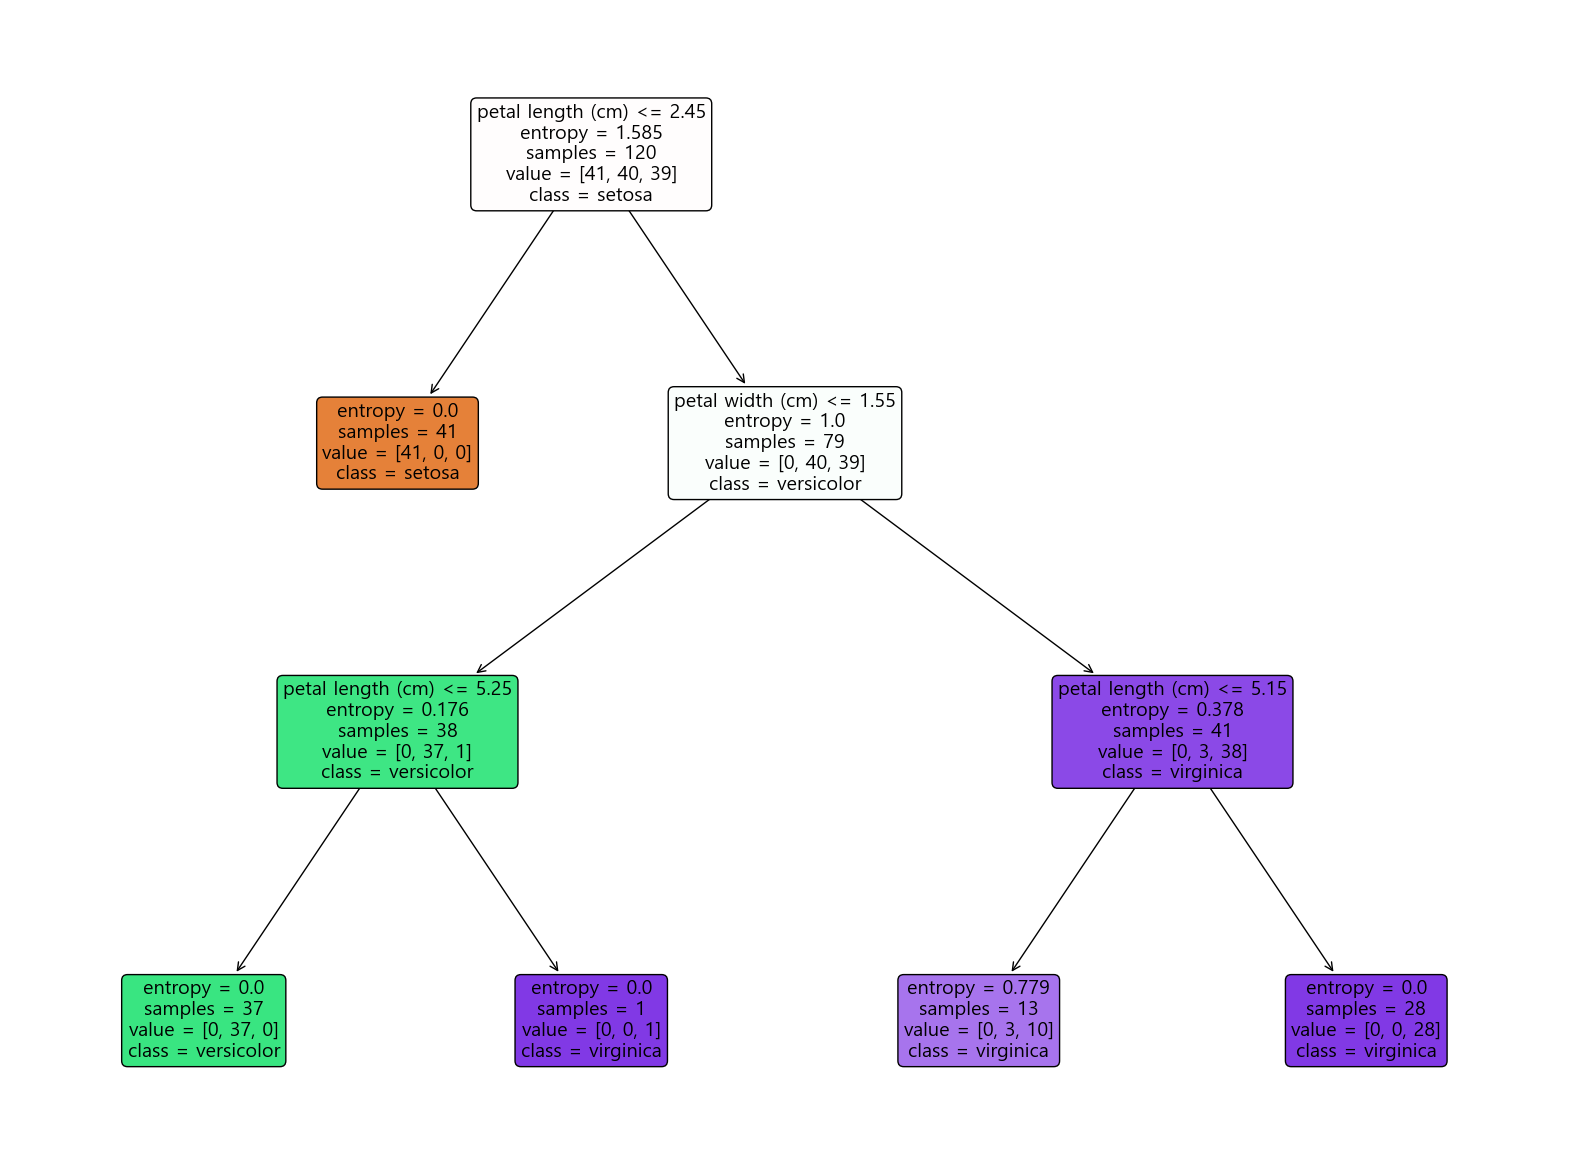

In [7]:
# DT시각화
# gini계수는 엔트로피와 마찬가지로 낮을수록 분류가 잘 된것으로 판단하며
# 기본적으로 의사결정 나무는 imformation gain(정보이득지수)을 낮추는 방향으로 분류를 진행
from sklearn import tree
plt.figure(figsize=(20,15))

tree.plot_tree(dt_clf, filled=True,
               feature_names=iris.feature_names, class_names=iris.target_names,
               rounded=True, fontsize=14)
plt.show(); plt.close()

Feature Importances:
[0.    0.    0.684 0.316]

sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.684
petal width (cm): 0.316


<AxesSubplot:>

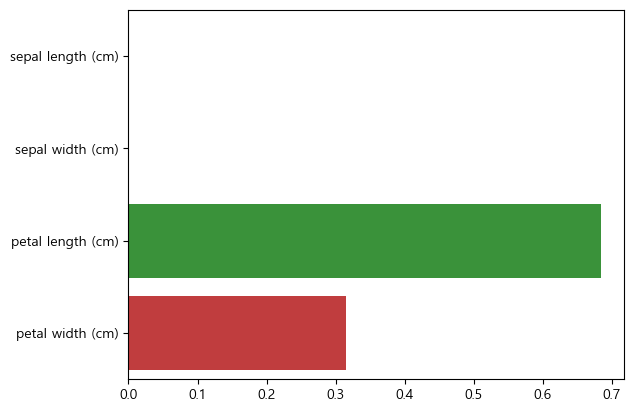

In [8]:
# feature importances(중요도) 추출
print(f'''Feature Importances:
{np.round(dt_clf.feature_importances_, 3)}\n''')

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name}: {value:.3f}')
    
# feature importance를 칼럼 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 결정트리(Decision Tree) 과적합(Overfitting)

- n_informative: 각 클래스에서 독립변수로 유용하게 작용하는 특성의 수를 지정
    - 결정경계와 관련있는 유용한 피처 수를 지정(디폴트 = 전체 피처 수/2)
- n_clusters_per_class: 각 클래스 당 클러스터 수(디폴트=1)

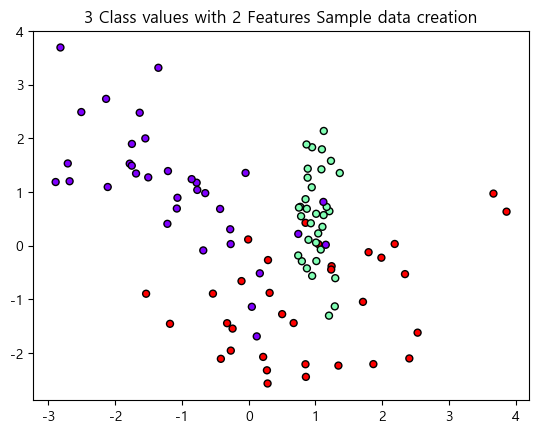

In [40]:
from sklearn.datasets import make_classification
plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해 피처는 2개, 결정값 클래스(레이블)는 3가지
# 유형의 classification 샘플 데이터 생성
x_features, y_labels = make_classification(n_features=2, 
            n_redundant=0, n_informative=2, n_classes=3,
            n_clusters_per_class=1, random_state=0)

# plot형태로 2개의 피처로 2차원 좌표 시각화
# 각 클래스값은 다른 색으로 표시됨
plt.scatter(x_features[:,0], x_features[:,1],
            marker='o', c=y_labels, s=25,
            cmap='rainbow', edgecolor='k')

In [36]:
### 강사님이 복붙해 주심

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

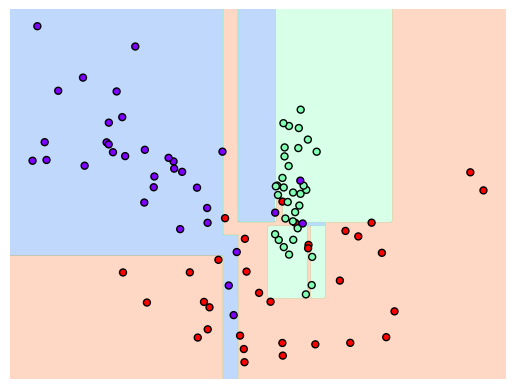

In [44]:
# 특정한 트리 생성 제약없는 결정트리의 Decsion Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

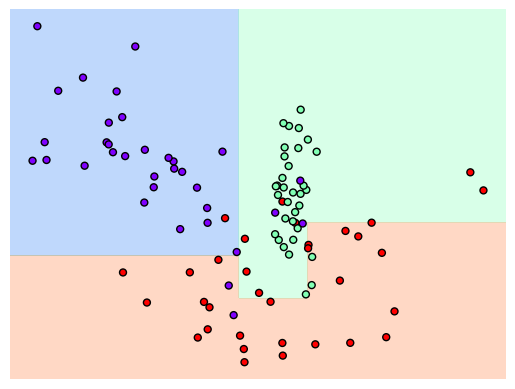

In [45]:
# min_samples_leaf=6 으로 트리 생성조건을 제약한 Decsion Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

### 강사님 코드

### 결정 트리 모델의 시각화(Decision Tree Visualization)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)


### 결정 트리(Decision TREE) 과적합(Overfitting)

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - Human Activity Recognition

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])


**중복된 피처명을 확인**

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

**원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.**  
**중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성**

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

In [ ]:
print(y_train['action'].value_counts())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

In [ ]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

In [ ]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()